In [12]:
from google.colab import files

# Upload kaggle.json from your computer
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{\r\n    "username":"mjmanjit",   \r\n    "key":"KGAT_802bf1bf9b28de44cc36633d12f36c2d"\r\n\r\n}'}

In [13]:
!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


In [19]:
!kaggle datasets download biaiscience/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats
License(s): DbCL-1.0
 99% 811M/817M [00:15<00:00, 78.5MB/s]
100% 817M/817M [00:16<00:00, 53.4MB/s]


In [20]:
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [21]:
import os
files_names =os.listdir('/content/train/train')
print(files_names)

['dog.11228.jpg', 'dog.303.jpg', 'cat.9272.jpg', 'dog.3571.jpg', 'cat.3360.jpg', 'cat.758.jpg', 'dog.1329.jpg', 'cat.9097.jpg', 'dog.11702.jpg', 'dog.12099.jpg', 'dog.9039.jpg', 'dog.9910.jpg', 'dog.11592.jpg', 'dog.2170.jpg', 'cat.7234.jpg', 'cat.2766.jpg', 'cat.9897.jpg', 'dog.3467.jpg', 'cat.11738.jpg', 'dog.23.jpg', 'cat.8477.jpg', 'dog.7617.jpg', 'dog.5322.jpg', 'cat.3673.jpg', 'dog.5297.jpg', 'cat.2164.jpg', 'dog.9150.jpg', 'dog.1793.jpg', 'cat.9026.jpg', 'cat.11519.jpg', 'cat.2900.jpg', 'dog.7501.jpg', 'dog.7457.jpg', 'cat.9495.jpg', 'cat.5367.jpg', 'cat.7590.jpg', 'dog.4408.jpg', 'dog.8724.jpg', 'dog.503.jpg', 'cat.274.jpg', 'cat.6890.jpg', 'cat.1393.jpg', 'dog.1275.jpg', 'dog.4347.jpg', 'cat.4214.jpg', 'cat.9844.jpg', 'dog.9724.jpg', 'cat.1205.jpg', 'cat.4501.jpg', 'cat.7536.jpg', 'cat.6331.jpg', 'dog.12365.jpg', 'cat.11423.jpg', 'cat.2762.jpg', 'dog.8976.jpg', 'cat.4357.jpg', 'cat.10710.jpg', 'dog.8276.jpg', 'dog.3834.jpg', 'dog.9322.jpg', 'dog.8853.jpg', 'dog.1654.jpg', 'cat

In [14]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mping
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

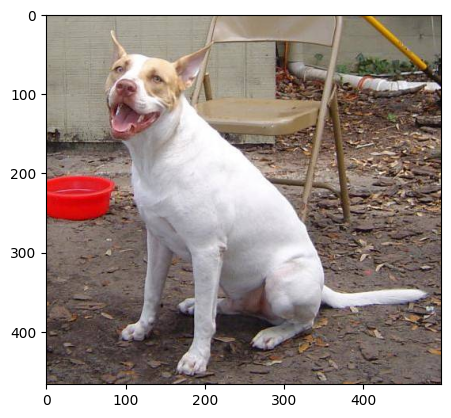

In [22]:
# display dog image
img = mping.imread('/content/train/train/dog.12118.jpg')
imgplot = plt.imshow(img)
plt.show()

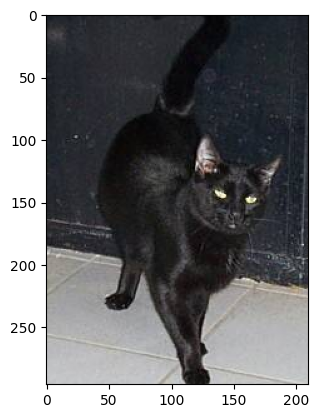

In [23]:
# display cat image
img = mping.imread('/content/train/train/cat.3817.jpg')
imgplot = plt.imshow(img)
plt.show()

In [24]:
# resize all image in same size
files_names =os.listdir('/content/train/train')

for i in range(5):
  name=files_names[i]
  print(name[0:3])

dog
dog
cat
dog
cat


In [25]:
# resize all image in same size
files_names =os.listdir('/content/train/train')

dog_count = 0
cat_count = 0

for img_file in files_names:
  name=img_file[0:3]
  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1
print('Number of dag images =',dog_count)
print('Number of cat images =',cat_count)

Number of dag images = 12500
Number of cat images = 12500


In [26]:
os.mkdir('/content/resized_train')


In [27]:

original_folder = '/content/train/train'
resized_folder = '/content/resized_train'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = os.path.join(original_folder, filename) # Use os.path.join for path construction

  img = Image.open(img_path) # Corrected variable name from imp_path to img_path
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgpath = os.path.join(resized_folder, filename) # Use os.path.join for path construction
  img.save(newImgpath)

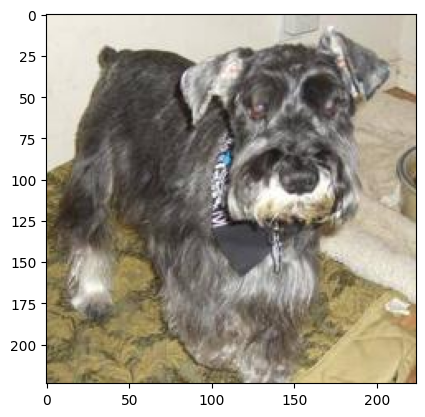

In [32]:
# display dog image
img = mping.imread('/content/resized_train/dog.3571.jpg')
imgplot = plt.imshow(img)
plt.show()

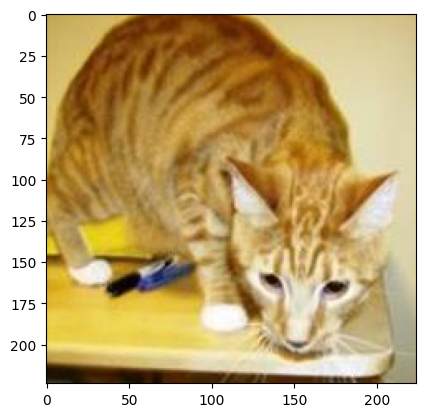

In [34]:
# display cat image
img = mping.imread('/content/resized_train/cat.9272.jpg')
imgplot = plt.imshow(img)
plt.show()

In [35]:
# creating dogs and cats images
# cat --> 0 , dog --> 1
filenames = os.listdir('/content/resized_train')
labels = []
for i in range(2000):
  file_name =filenames[i]
  label = file_name[0:3]
  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [36]:
print(labels[0:5])
print(len(labels))

[1, 1, 0, 1, 0]
2000


In [37]:
# counting the images of dogs and cats out of 2000 images
values,counts = np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1009  991]


In [38]:
import glob
import cv2


In [39]:
# convert all resize images to numpy array

image_directory = '/content/resized_train'

files = []
for file in os.listdir(image_directory):
  if file.lower().endswith(('.jpg','.png')):
    files.append(os.path.join(image_directory,file))

print(len(files))

2000


In [40]:
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [41]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [42]:
print(dog_cat_images)

[[[[154 157 171]
   [154 157 171]
   [154 157 171]
   ...
   [140 147 150]
   [141 149 156]
   [142 152 159]]

  [[155 158 172]
   [155 158 172]
   [154 157 171]
   ...
   [151 157 162]
   [147 155 162]
   [146 156 163]]

  [[153 156 170]
   [152 155 169]
   [152 155 169]
   ...
   [152 158 163]
   [147 155 162]
   [148 157 166]]

  ...

  [[154 155 165]
   [156 157 167]
   [159 160 170]
   ...
   [169 169 175]
   [169 169 175]
   [169 169 175]]

  [[158 159 169]
   [159 160 170]
   [159 160 170]
   ...
   [169 169 175]
   [169 169 175]
   [168 168 174]]

  [[161 162 172]
   [160 161 171]
   [159 160 170]
   ...
   [168 168 174]
   [167 167 173]
   [167 167 173]]]


 [[[ 18  32  31]
   [ 31  45  43]
   [ 54  65  63]
   ...
   [121 135 129]
   [180 194 188]
   [210 225 217]]

  [[ 13  27  26]
   [ 22  36  34]
   [ 44  58  54]
   ...
   [153 167 161]
   [184 199 191]
   [211 227 216]]

  [[ 20  34  32]
   [ 15  29  27]
   [ 31  45  41]
   ...
   [156 171 163]
   [207 221 210]
   [219 233

In [43]:
X = dog_cat_images
Y = np.asarray(labels)

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [45]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [46]:
# scale the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255


In [47]:
print(X_train_scaled)

[[[[0.1372549  0.23921569 0.12156863]
   [0.12941176 0.23137255 0.11372549]
   [0.09803922 0.18431373 0.0745098 ]
   ...
   [0.18431373 0.20784314 0.07058824]
   [0.14901961 0.16470588 0.05098039]
   [0.12941176 0.14901961 0.04313725]]

  [[0.14509804 0.23921569 0.12156863]
   [0.14117647 0.23529412 0.11764706]
   [0.12941176 0.21568627 0.10588235]
   ...
   [0.17254902 0.19215686 0.06666667]
   [0.15294118 0.17254902 0.06666667]
   [0.14901961 0.16470588 0.06666667]]

  [[0.18431373 0.27058824 0.15686275]
   [0.18823529 0.2745098  0.16078431]
   [0.21176471 0.28627451 0.18039216]
   ...
   [0.12156863 0.1372549  0.02352941]
   [0.11372549 0.1254902  0.03921569]
   [0.10980392 0.12941176 0.04705882]]

  ...

  [[0.09019608 0.08235294 0.08235294]
   [0.09019608 0.08235294 0.08235294]
   [0.05098039 0.04313725 0.04313725]
   ...
   [0.45882353 0.43137255 0.41960784]
   [0.44313725 0.41960784 0.4       ]
   [0.42745098 0.40392157 0.38431373]]

  [[0.09411765 0.08627451 0.08627451]
   [0.0

In [48]:
# create the NN

import tensorflow as tf
import tensorflow_hub as hub

In [49]:
mobilenet_model = tf.keras.applications.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

In [50]:
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [51]:
num_of_classes = 2
inputs = tf.keras.Input(shape=(224,224,3))
x = pretrained_model(inputs)
outputs = tf.keras.layers.Dense(num_of_classes,activation='softmax')(x)
model = tf.keras.Model(inputs,outputs)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 1000)           │     3,538,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         2,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,540,986 (13.51 MB)

 Trainable params: 3,506,874 (13.38 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [52]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [53]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 ━━━━━━━━━━━━━━━━━━━━ 379s 7s/step - acc: 0.8438 - loss: 0.6537
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 332s 7s/step - acc: 0.8402 - loss: 0.6141
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 338s 7s/step - acc: 0.8020 - loss: 0.6013
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 379s 7s/step - acc: 0.7754 - loss: 0.5920
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 376s 7s/step - acc: 0.8052 - loss: 0.5628


In [54]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test loss:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - acc: 0.4836 - loss: 0.7419
Test loss: 0.7269541025161743
Test accuracy: 0.5099999904632568


In [58]:
# predictive system
input_image_path = input('Path of the image to be predictive: ')
input_image = cv2.imread(input_image_path)
input_image_resize = cv2.resize(input_image,(224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])
input_prediction =model.predict(image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('The image is a cat')

else:
  print('The image is a dog')

Path of the image to be predictive: /content/dog.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
[[0.6377417  0.36225834]]
0
The image is a dog
